In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from scipy.stats import mode

Logistic Regression Accuracy: 0.5063025210084033
Random Forest Accuracy: 0.680672268907563
K-Nearest Neighbors Accuracy: 0.5399159663865546
Ensemble Accuracy (Adjusted Threshold): 0.6302521008403361

Classification Report for Ensemble Model (Adjusted Threshold):
               precision    recall  f1-score   support

           0       0.55      0.60      0.57       196
           1       0.70      0.65      0.68       280

    accuracy                           0.63       476
   macro avg       0.62      0.63      0.62       476
weighted avg       0.64      0.63      0.63       476



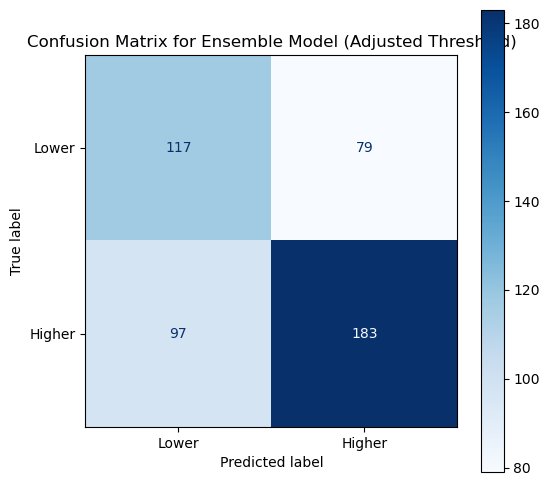

In [32]:
data = pd.read_csv('berkshire_hathaway_data.csv')

X = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
y30 = data['Thirty Out'].values
close_prices = data['Close'].values
y = (y30 > close_prices).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=325)

# Initialize classification models
log_reg_model = LogisticRegression(max_iter=1000, random_state=325)
rf_clf_model = RandomForestClassifier(n_estimators=100, random_state=325)
knn_clf_model = KNeighborsClassifier(n_neighbors=5)

# Train models
log_reg_model.fit(X_train, y_train)
rf_clf_model.fit(X_train, y_train)
knn_clf_model.fit(X_train, y_train)

# Model Probabilities
proba_log = log_reg_model.predict_proba(X_test)[:, 1]
proba_rf = rf_clf_model.predict_proba(X_test)[:, 1]
proba_knn = knn_clf_model.predict_proba(X_test)[:, 1]

# Ensemble probabilities
ensemble_proba = (proba_log + proba_rf + proba_knn) / 3

# Decision threshold
threshold = 0.6
y_ensemble = (ensemble_proba >= threshold).astype(int)

# Evaluate ensemble
print("Logistic Regression Accuracy:", accuracy_score(y_test, (proba_log >= threshold).astype(int)))
print("Random Forest Accuracy:", accuracy_score(y_test, (proba_rf >= threshold).astype(int)))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, (proba_knn >= threshold).astype(int)))
print("Ensemble Accuracy (Adjusted Threshold):", accuracy_score(y_test, y_ensemble))
print("\nClassification Report for Ensemble Model (Adjusted Threshold):\n", classification_report(y_test, y_ensemble))

# Confusion Matrix
cm = confusion_matrix(y_test, y_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Lower", "Higher"])

# Plot the Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix for Ensemble Model (Adjusted Threshold)")
plt.show()

# # Model predictions
# y_pred_log = log_reg_model.predict(X_test)
# y_pred_rf = rf_clf_model.predict(X_test)
# y_pred_knn = knn_clf_model.predict(X_test)

# # Ensemble predictions (majority voting)
# ensemble_predictions = np.array([y_pred_log, y_pred_rf, y_pred_knn])
# y_ensemble = mode(ensemble_predictions, axis=0, keepdims=True).mode[0]

Logistic Regression Accuracy: 0.5063025210084033
Random Forest Accuracy: 0.680672268907563
SVM Accuracy: 0.5882352941176471
Ensemble Accuracy (Adjusted Threshold): 0.6827731092436975

Classification Report for Ensemble Model (Adjusted Threshold):
               precision    recall  f1-score   support

           0       0.62      0.61      0.61       196
           1       0.73      0.74      0.73       280

    accuracy                           0.68       476
   macro avg       0.67      0.67      0.67       476
weighted avg       0.68      0.68      0.68       476



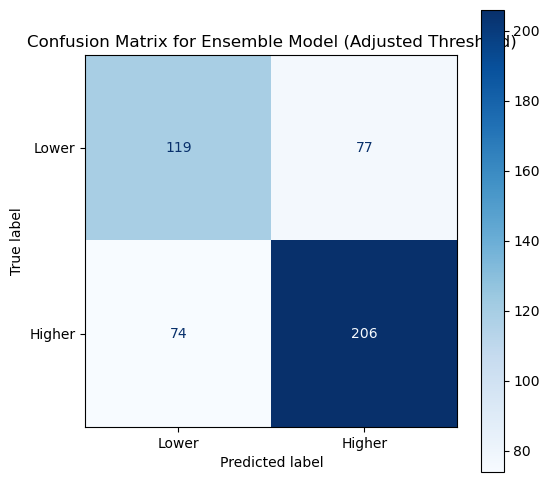

In [41]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Import SVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Suppress warnings
warnings.filterwarnings("ignore", message=".*default value of `keepdims`.*")

# Load the dataset
data = pd.read_csv('berkshire_hathaway_data.csv')

# Features and target
X = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
y30 = data['Thirty Out'].values
close_prices = data['Close'].values
y = (y30 > close_prices).astype(int)  # Binary classification: 1 (Higher), 0 (Lower)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=325)

# Initialize classification models
log_reg_model = LogisticRegression(max_iter=1000, random_state=325)
rf_clf_model = RandomForestClassifier(n_estimators=100, random_state=325)
svm_clf_model = SVC(probability=True, random_state=325)  # Enable probability outputs for SVM

# Train models
log_reg_model.fit(X_train, y_train)
rf_clf_model.fit(X_train, y_train)
svm_clf_model.fit(X_train, y_train)

# Model probabilities
proba_log = log_reg_model.predict_proba(X_test)[:, 1]
proba_rf = rf_clf_model.predict_proba(X_test)[:, 1]
proba_svm = svm_clf_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (Higher)

# Ensemble probabilities
ensemble_proba = (proba_log + proba_rf + proba_svm) / 3

# Decision threshold
threshold = 0.6
y_ensemble = (ensemble_proba >= threshold).astype(int)

# Evaluate ensemble
print("Logistic Regression Accuracy:", accuracy_score(y_test, (proba_log >= threshold).astype(int)))
print("Random Forest Accuracy:", accuracy_score(y_test, (proba_rf >= threshold).astype(int)))
print("SVM Accuracy:", accuracy_score(y_test, (proba_svm >= threshold).astype(int)))
print("Ensemble Accuracy (Adjusted Threshold):", accuracy_score(y_test, y_ensemble))
print("\nClassification Report for Ensemble Model (Adjusted Threshold):\n", classification_report(y_test, y_ensemble))

# Confusion Matrix
cm = confusion_matrix(y_test, y_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Lower", "Higher"])

# Plot the Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix for Ensemble Model (Adjusted Threshold)")
plt.show()


In [23]:
# # Evaluate the individual models and the ensemble
# print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
# print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
# print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
# print("Ensemble Accuracy:", accuracy_score(y_test, y_ensemble))

# print("\nClassification Report for Ensemble Model:\n", classification_report(y_test, y_ensemble))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_ensemble)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Lower", "Higher"])

# fig, ax = plt.subplots(figsize=(6, 6))
# disp.plot(cmap='Blues', ax=ax, values_format='d')
# plt.title("Confusion Matrix for Ensemble Model")
# plt.show()

# # Accuracy
# x_axis = np.linspace(0, len(y_test), len(y_test))
# plt.scatter(x_axis, y_test, label='Actual', alpha=0.7, color='blue')
# plt.scatter(x_axis, y_ensemble, label='Ensemble Predicted', alpha=0.7, color='orange')
# plt.legend()
# plt.title('Ensemble Binary Classification Results')
# plt.show()